### 워드 클라우드
##### 1. exe파일에서 추출한 텍스트에서 워드클라우드로 표현 -> html파일 제출

In [ ]:
# 아나콘다 프롬프트로 실행
#!conda install -c conda-forge wordcloud

In [1]:
import pandas as pd
import lxml.html
import requests
import os, re, csv
import urllib.request as ur 
from bs4 import BeautifulSoup as bs

In [2]:
# 뉴스기사 텍스트 추출
import os, re, csv
import requests # URL 주소에 있는 내용을 요청할 때 사용하는 모듈
import urllib.request as ur  # 웹에서 얻은 데이터를 다루는 파이썬 패키지
from bs4 import BeautifulSoup as bs

# 기사 제목, 본문, 하이퍼링크 파일로 저장하기
url = 'https://www.mbn.co.kr/news/date/'
soup = bs(ur.urlopen(url).read(), 'html.parser')

f = open('article_mbn.txt','w')
for i in soup.find_all('dt', {"class":"tit"}):
    try:
        f.write(i.text + '\n')  # 기사 제목
        #print(i.text + '\n')
        f.write('http:' + i.find_all('a')[0].get('href') + '\n')  # 기사 URL링크
        #print('http:' + i.find_all('a')[0].get('href') + '\n')
        soup2 = bs(ur.urlopen('http:' + i.find_all('a')[0].get('href')).read(), 'html.parser')
        for j in soup2.find_all('div', {"class":"detail"}):
            f.write(j.text + '\n')   # 기사 본문
            #print(j.text + '\n')
    except:
        pass
f.close()

In [3]:
# 기사 본문 중1개를 변수에 저장
article1 = 'http://www.mbn.co.kr/news/economy/4426433?page=1&date=20210217'
soup1 = bs(ur.urlopen(article1).read(), 'html.parser')
for i in soup1.find_all('div', {"class":"detail"}):
    content = i.text
    print(content)


↑ 박진규 차관 '소재·부품·장비 자립 초석 확보' / 사진=연합뉴스
정부가 올해 수출을 상승세로 전환하고 한국판 뉴딜 관련 대형 투자를 단행해 경제회복 속도를 높일 뿐만 아니라 탄소중립, 디지털 전환 등으로 산업 구조를 혁신해 첨단 제조 강국으로 도약한다는 목표를 세웠습니다.

산업통상자원부는 오늘(17일) 이런 내용을 중심으로 하는 2021년 업무계획을 발표했습니다.

산업부는 올해 ▲ 수출 플러스 전환 ▲ 한국판 뉴딜 선도 ▲ 첨단산업 강국 도약 ▲ 탄소중립 에너지 혁신 ▲ 글로벌 연대·협력 등 5개 과제의 20개 주요 사업을 중점적으로 추진합니다.

먼저 수출의 플러스 전환을 위해 무역금융 167조 원 공급, 수요 맞춤형 무역보험 출시, 수출신고 즉시 보험가입 도입(하반기) 등으로 수출기업 지원을 확대합니다.

소상공인·뿌리기업 등 신규 수출기업 1만개 양성을 목표로 수출 첫걸음 패키지 도입(500개사), 수출 통합지원 플랫폼 '무역투자 24' 구축(하반기) 등에도 나섭니다.

K-방역, 웹툰 등 소프트파워의 수출 확대를 중점 지원하는 한편 전시·판로·계약 등 수출 전 과정의 디지털화에 주력할 계획입니다. 이를 통해 올해 무역액 1조 달러를 회복하고 나아가 수출 4대 강국으로 도약한다는 목표입니다.

아울러 한국판 뉴딜 관련 민간투자를 견인할 대형 프로젝트를 본격적으로 집행해 새만금 태양광(상반기), 전남 신안 해상풍력(하반기) 등 그린뉴딜 관련 신재생 대형 프로젝트의 연내 착공을 추진합니다.

올해 한국판 뉴딜 관련 예산은 정부 2조3천억 원, 공공기관 3조9천억 원 등 총 6조2천억 원으로 책정됐습니다. 민간투자 예상 금액은 새만금 태양광 5조8천억 원, 서남권 해상풍력 14조 원, 신안 해상풍력 45조 원입니다.

아파트 140만호(정부)와 주택 230만호(한전) 등에는 스마트미터(AMI)를 신규 보급할 예정입니다.

디지털뉴딜과 관련해선 미래차·가전·조선 등 10대 분야의 데이터 플랫폼을 구축하고 스마트그린산단을 총 10개로 확대합니다.

'지

In [4]:
def remove_non_word(text):
    """한글, 알파벳, 숫자, . 를 제외한 문자를 제거"""
    return re.sub(r'[^가-힣A-z0-9.]+', ' ', text)

In [5]:
remove_non_word(content)

' 박진규 차관 소재 부품 장비 자립 초석 확보 사진 연합뉴스 정부가 올해 수출을 상승세로 전환하고 한국판 뉴딜 관련 대형 투자를 단행해 경제회복 속도를 높일 뿐만 아니라 탄소중립 디지털 전환 등으로 산업 구조를 혁신해 첨단 제조 강국으로 도약한다는 목표를 세웠습니다. 산업통상자원부는 오늘 17일 이런 내용을 중심으로 하는 2021년 업무계획을 발표했습니다. 산업부는 올해 수출 플러스 전환 한국판 뉴딜 선도 첨단산업 강국 도약 탄소중립 에너지 혁신 글로벌 연대 협력 등 5개 과제의 20개 주요 사업을 중점적으로 추진합니다. 먼저 수출의 플러스 전환을 위해 무역금융 167조 원 공급 수요 맞춤형 무역보험 출시 수출신고 즉시 보험가입 도입 하반기 등으로 수출기업 지원을 확대합니다. 소상공인 뿌리기업 등 신규 수출기업 1만개 양성을 목표로 수출 첫걸음 패키지 도입 500개사 수출 통합지원 플랫폼 무역투자 24 구축 하반기 등에도 나섭니다. K 방역 웹툰 등 소프트파워의 수출 확대를 중점 지원하는 한편 전시 판로 계약 등 수출 전 과정의 디지털화에 주력할 계획입니다. 이를 통해 올해 무역액 1조 달러를 회복하고 나아가 수출 4대 강국으로 도약한다는 목표입니다. 아울러 한국판 뉴딜 관련 민간투자를 견인할 대형 프로젝트를 본격적으로 집행해 새만금 태양광 상반기 전남 신안 해상풍력 하반기 등 그린뉴딜 관련 신재생 대형 프로젝트의 연내 착공을 추진합니다. 올해 한국판 뉴딜 관련 예산은 정부 2조3천억 원 공공기관 3조9천억 원 등 총 6조2천억 원으로 책정됐습니다. 민간투자 예상 금액은 새만금 태양광 5조8천억 원 서남권 해상풍력 14조 원 신안 해상풍력 45조 원입니다. 아파트 140만호 정부 와 주택 230만호 한전 등에는 스마트미터 AMI 를 신규 보급할 예정입니다. 디지털뉴딜과 관련해선 미래차 가전 조선 등 10대 분야의 데이터 플랫폼을 구축하고 스마트그린산단을 총 10개로 확대합니다. 지역활력 2.0 전략을 통해 5대 권역별 신산업도 육성합니다. 동남권은 친환경선박

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')  ## 불용어 처리(영어 관사 제거)

In [7]:
tdm = cv.fit_transform([remove_non_word(content)]).toarray()
tdm

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 3, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
        2, 1, 2, 1, 1, 1, 1, 1, 5, 2, 1, 4, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 4, 3, 1, 1,
        2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
        1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 3, 2, 1, 3, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 3, 1, 1, 1, 4, 1, 1, 1, 1, 7, 2, 1, 1, 1, 1, 1, 1, 1, 4,
        1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 2, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
        3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 

In [8]:
df = pd.DataFrame({
    'word': cv.get_feature_names(),
    'freq': tdm.flat   ## 빈도
})

In [9]:
df

,word,freq
0,100개를,1
1,100건,1
2,10개,1
3,10개로,1
4,10대,1
...,...,...
419,확정됐습니다,1
420,환태평양경제동반자협정,1
421,활용해,1
422,회복하고,1


In [10]:
df.sort_values('freq', ascending=False).head(20)

,word,freq
210,수출,7
249,올해,6
74,관련,5
359,추진합니다,5
105,뉴딜,4
392,하반기,4
219,신규,4
128,등으로,4
397,해상풍력,4
77,구축,4


In [11]:
from wordcloud import WordCloud

In [12]:
wc = WordCloud(font_path='C:\Windows\Fonts\malgun.ttf', width=400, height=400, background_color='white')
# 한글 파일일 경우 폰트 지정할 것.

In [13]:
# dictionery 형태로 변경
frequencies = {word: freq for word, freq in zip(cv.get_feature_names(), tdm.flat)}
frequencies

{'100개를': 1,
 '100건': 1,
 '10개': 1,
 '10개로': 1,
 '10대': 1,
 '140만호': 1,
 '14조': 1,
 '167조': 1,
 '17일': 1,
 '180기': 1,
 '1개': 3,
 '1만개': 1,
 '1조': 2,
 '1조1천억': 1,
 '1조7천억': 1,
 '1천200억': 1,
 '2021년': 3,
 '20개': 1,
 '20대': 1,
 '21기를': 1,
 '230만호': 1,
 '24': 1,
 '2개': 1,
 '2조3천억': 1,
 '30': 1,
 '338개': 1,
 '3조9천억': 1,
 '45조': 1,
 '4대': 3,
 '500개사': 1,
 '500억': 1,
 '5개': 2,
 '5기는': 1,
 '5대': 1,
 '5조8천억': 1,
 '6조2천억': 1,
 '73기를': 1,
 '9개': 1,
 'ai': 1,
 'ami': 1,
 'cnc': 1,
 'cptpp': 1,
 'cptpp와': 1,
 'cpttp': 1,
 'fta': 1,
 'rcep': 1,
 're100도': 1,
 '가속화': 1,
 '가입': 1,
 '가입에': 1,
 '가전': 3,
 '각각': 2,
 '감면': 1,
 '강국': 1,
 '강국으로': 3,
 '강국이자': 1,
 '강화하는': 1,
 '개발': 2,
 '개선하는': 1,
 '검토': 1,
 '견인할': 1,
 '경북권은': 1,
 '경우': 1,
 '경제회복': 1,
 '계약': 1,
 '계획': 1,
 '계획입니다': 2,
 '공공기관': 1,
 '공급': 2,
 '공급과': 1,
 '공급망을': 1,
 '공존형': 1,
 '과정의': 1,
 '과제의': 1,
 '관련': 5,
 '관련해선': 2,
 '구조를': 1,
 '구축': 4,
 '구축하고': 1,
 '구축한': 1,
 '구축할': 1,
 '국내': 2,
 '국내조달': 1,
 '국산화': 1,
 '국영기업': 1,
 '권역별': 1,
 '규모의': 1,
 '규범': 1,

In [14]:
wc.fit_words(frequencies)

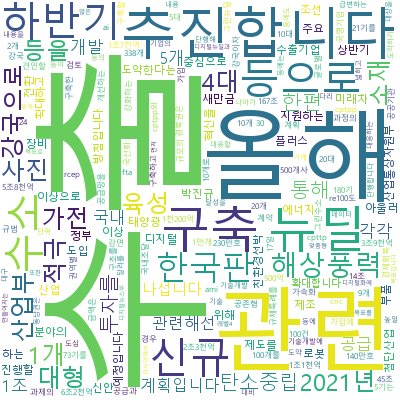

In [15]:
wc.to_image()

### 웹 스크래핑
##### 2. 쇼핑몰에서 상품이름과 해당상품의 상세화면 url을 엑셀로 저장 -> html파일, 엑셀파일 제출

In [ ]:
#!pip install cssselect

In [16]:
import pandas as pd
import lxml.html
import requests
import urllib.parse

In [17]:
# GET 요청을 보내고 응답을 받아와 res 변수에 할당한다.
url = 'http://browse.gmarket.co.kr/list?category=300012436'
res = requests.get(url)
res

<Response [200]>

In [18]:
#res.text

In [19]:
root = lxml.html.fromstring(res.text)
root

<Element html at 0x296e298e3b0>

In [20]:
root.cssselect('a')

[<Element a at 0x296e29ae6d0>,
 <Element a at 0x296e29ae4f0>,
 <Element a at 0x296e296fc70>,
 <Element a at 0x296d18618b0>,
 <Element a at 0x296e1e24d60>,
 <Element a at 0x296e298e1d0>,
 <Element a at 0x296e298e220>,
 <Element a at 0x296e298e090>,
 <Element a at 0x296e298e2c0>,
 <Element a at 0x296e298e360>,
 <Element a at 0x296e28f54a0>,
 <Element a at 0x296e2938720>,
 <Element a at 0x296e2d1c5e0>,
 <Element a at 0x296e2d1c6d0>,
 <Element a at 0x296e2d1c770>,
 <Element a at 0x296e2d1c720>,
 <Element a at 0x296e2d1c7c0>,
 <Element a at 0x296e2d1c810>,
 <Element a at 0x296e2d1c860>,
 <Element a at 0x296e2d1c8b0>,
 <Element a at 0x296e2d1c900>,
 <Element a at 0x296e2d1c950>,
 <Element a at 0x296e2d1c9a0>,
 <Element a at 0x296e2d1c9f0>,
 <Element a at 0x296e2d1ca40>,
 <Element a at 0x296e2d1ca90>,
 <Element a at 0x296e2d1cae0>,
 <Element a at 0x296e2d1cb30>,
 <Element a at 0x296e2d1cb80>,
 <Element a at 0x296e2d1cbd0>,
 <Element a at 0x296e2d1cc20>,
 <Element a at 0x296e2d1cc70>,
 <Elemen

In [21]:
links = root.cssselect('div.box__item-title a')
links

[<Element a at 0x296e2d230e0>,
 <Element a at 0x296e2d231d0>,
 <Element a at 0x296e2d232c0>,
 <Element a at 0x296e2d23400>,
 <Element a at 0x296e2d23540>,
 <Element a at 0x296e2d23680>,
 <Element a at 0x296e2d237c0>,
 <Element a at 0x296e2d23900>,
 <Element a at 0x296e2d23ae0>,
 <Element a at 0x296e2d23c20>,
 <Element a at 0x296e2d23d60>,
 <Element a at 0x296e2d23ea0>,
 <Element a at 0x296e2d24040>,
 <Element a at 0x296e2d24180>,
 <Element a at 0x296e2d242c0>,
 <Element a at 0x296e2d24400>,
 <Element a at 0x296e2d24540>,
 <Element a at 0x296e2d24680>,
 <Element a at 0x296e2d247c0>,
 <Element a at 0x296e2d248b0>,
 <Element a at 0x296e2d249f0>,
 <Element a at 0x296e2d24b30>,
 <Element a at 0x296e2d24c70>,
 <Element a at 0x296e2d24db0>,
 <Element a at 0x296e2d24ef0>,
 <Element a at 0x296e2d25090>,
 <Element a at 0x296e2d251d0>,
 <Element a at 0x296e2d25310>,
 <Element a at 0x296e2d25450>,
 <Element a at 0x296e2d25590>,
 <Element a at 0x296e2d256d0>,
 <Element a at 0x296e2d257c0>,
 <Elemen

In [22]:
link = links[0]
link

<Element a at 0x296e2d230e0>

In [23]:
link.attrib['href'] 

'http://item.gmarket.co.kr/Item?goodscode=1617178745'

In [24]:
for link in links:
    print(link.attrib['href'])

http://item.gmarket.co.kr/Item?goodscode=1617178745
http://item.gmarket.co.kr/Item?goodscode=1617205638
http://item.gmarket.co.kr/Item?goodscode=1581692880
http://item.gmarket.co.kr/Item?goodscode=1646427952
http://item.gmarket.co.kr/Item?goodscode=1579158802
http://item.gmarket.co.kr/Item?goodscode=1583003018
http://item.gmarket.co.kr/Item?goodscode=1585485450
http://item.gmarket.co.kr/Item?goodscode=1585487336
http://item.gmarket.co.kr/Item?goodscode=1607527508
http://item.gmarket.co.kr/Item?goodscode=1619233816
http://item.gmarket.co.kr/Item?goodscode=1581702259
http://item.gmarket.co.kr/Item?goodscode=1579105558
http://item.gmarket.co.kr/Item?goodscode=1583003018
http://item.gmarket.co.kr/Item?goodscode=1829678551
http://item.gmarket.co.kr/Item?goodscode=1607527508
http://item.gmarket.co.kr/Item?goodscode=1691634384
http://item.gmarket.co.kr/Item?goodscode=1829038607
http://item.gmarket.co.kr/Item?goodscode=1619233816
http://item.gmarket.co.kr/Item?goodscode=1371975330
http://item.

In [25]:
urls = []
for link in links:
    urls.append(link.attrib['href'])

In [26]:
urls

['http://item.gmarket.co.kr/Item?goodscode=1617178745',
 'http://item.gmarket.co.kr/Item?goodscode=1617205638',
 'http://item.gmarket.co.kr/Item?goodscode=1581692880',
 'http://item.gmarket.co.kr/Item?goodscode=1646427952',
 'http://item.gmarket.co.kr/Item?goodscode=1579158802',
 'http://item.gmarket.co.kr/Item?goodscode=1583003018',
 'http://item.gmarket.co.kr/Item?goodscode=1585485450',
 'http://item.gmarket.co.kr/Item?goodscode=1585487336',
 'http://item.gmarket.co.kr/Item?goodscode=1607527508',
 'http://item.gmarket.co.kr/Item?goodscode=1619233816',
 'http://item.gmarket.co.kr/Item?goodscode=1581702259',
 'http://item.gmarket.co.kr/Item?goodscode=1579105558',
 'http://item.gmarket.co.kr/Item?goodscode=1583003018',
 'http://item.gmarket.co.kr/Item?goodscode=1829678551',
 'http://item.gmarket.co.kr/Item?goodscode=1607527508',
 'http://item.gmarket.co.kr/Item?goodscode=1691634384',
 'http://item.gmarket.co.kr/Item?goodscode=1829038607',
 'http://item.gmarket.co.kr/Item?goodscode=16192

In [27]:
# 브랜드명과 상품명이 같이 출력되어서 title만 별도로 추출하여 texts에 저장
link.text_content()

'브랜드명 사조해표상품명  사조 마일드참치 250g x 10개 '

In [28]:
titles = root.cssselect('span.text__item')
titles

[<Element span at 0x296e29a3ea0>,
 <Element span at 0x296e2d2b4a0>,
 <Element span at 0x296e2d2bdb0>,
 <Element span at 0x296e2d2be00>,
 <Element span at 0x296e2d2be50>,
 <Element span at 0x296e2d2bea0>,
 <Element span at 0x296e2d2bef0>,
 <Element span at 0x296e2d2bf40>,
 <Element span at 0x296e2d2bf90>,
 <Element span at 0x296e2d32040>,
 <Element span at 0x296e2d32090>,
 <Element span at 0x296e2d320e0>,
 <Element span at 0x296e2d32130>,
 <Element span at 0x296e2d32180>,
 <Element span at 0x296e2d321d0>,
 <Element span at 0x296e2d32220>,
 <Element span at 0x296e2d32270>,
 <Element span at 0x296e2d322c0>,
 <Element span at 0x296e2d32310>,
 <Element span at 0x296e2d32360>,
 <Element span at 0x296e2d323b0>,
 <Element span at 0x296e2d32400>,
 <Element span at 0x296e2d32450>,
 <Element span at 0x296e2d324a0>,
 <Element span at 0x296e2d324f0>,
 <Element span at 0x296e2d32540>,
 <Element span at 0x296e2d32590>,
 <Element span at 0x296e2d325e0>,
 <Element span at 0x296e2d32630>,
 <Element span

In [29]:
title = titles[0]
title

<Element span at 0x296e29a3ea0>

In [30]:
title.text_content()

' 동원 살코기참치 덕용 1880g '

In [31]:
texts = []
for title in titles:
    texts.append(title.text_content())

In [32]:
texts

[' 동원 살코기참치 덕용 1880g ',
 ' 동원 살코기참치 1880g x 6캔(1박스) / 덕용참치 ',
 ' 야채 참치 100g 5캔+고추 참치 100g 5캔 ',
 ' 야채 참치 100g 15캔 ',
 ' 고추참치 100g(원터치) 10캔 ',
 ' 라이트 스탠다드 참치 100g 5캔+고추 참치 100g 5캔 ',
 ' 동원참치 살코기 100g 통조림 캔 ',
 ' 동원참치 살코기 150g 통조림 캔 ',
 ' 라이트 스탠다드 참치 100g 15캔 원터치 ',
 ' 고추참치 100g 15캔 ',
 ' 마일드 참치 100g 20캔 ',
 ' DHA 참치 100g 원터치 10개 ',
 ' 라이트 스탠다드 참치 100g 5캔+고추 참치 100g 5캔 ',
 ' 사조 고추참치 100G X 10개 ',
 ' 라이트 스탠다드 참치 100g 15캔 원터치 ',
 ' 동원 살코기참치 150g x10캔 ',
 ' 온더고 냉동 소고기와 오색비빔밥 310g x 5개 +2셋떡볶 ',
 ' 고추참치 100g 15캔 ',
 '  사조대림  사조참치 100gX15캔 /안심따개/통조림/참치캔/찌개 ',
 ' 동원 참치 150g x 14캔 / 참치캔 마일드 살코기 고추 ',
 ' 라이트스탠다드 135g x7캔 +고추참치 85g x 3캔+랜덤 ',
 ' 마일드 참치 100g 20캔 ',
 ' DHA 참치 100g 원터치 10개 ',
 ' 사조참치(안심따개) 살코기 100g x20캔 ',
 ' 라이트 스탠다드 참치 100g 5캔+고추 참치 100g 5캔 ',
 ' 동원 마일드 참치 100g x 20캔 / 참치캔 통조림 ',
 ' 사조 고추참치 100G X 10개 ',
 ' 동원 마일드 참치 150g x 20개 / 참치캔 통조림 ',
 ' 살코기 라이트 스탠다드 참치 85g 20캔 사조 X ',
 ' 야채 참치 100g 5캔+고추 참치 100g 5캔 ',
 ' 살코기 참치캔 150g 12개/사조 참치/고추/야채/마일드 ',
 ' 동원 살코기 참치 85gx10+고추참치 85x10캔 실속구

In [33]:
df = pd.DataFrame({'url': urls, 'text': texts})

In [34]:
df.head()

,url,text
0,http://item.gmarket.co.kr/Item?goodscode=16171...,동원 살코기참치 덕용 1880g
1,http://item.gmarket.co.kr/Item?goodscode=16172...,동원 살코기참치 1880g x 6캔(1박스) / 덕용참치
2,http://item.gmarket.co.kr/Item?goodscode=15816...,야채 참치 100g 5캔+고추 참치 100g 5캔
3,http://item.gmarket.co.kr/Item?goodscode=16464...,야채 참치 100g 15캔
4,http://item.gmarket.co.kr/Item?goodscode=15791...,고추참치 100g(원터치) 10캔


In [35]:
df.to_excel('G마켓_참치캔.xlsx', index=False) # 인덱스 없이 추출